### Used to extract .jpg images from CIFAR10 of each class

In [52]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import torchvision

In [53]:
# load images
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)
testdata = [np.array(img) for (img, y) in testset]
testlabels = [y for (img, y) in testset]
n_test = len(testdata)

n_class = 10
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

Files already downloaded and verified


In [54]:
# TODO: Change this probability metric to be the
# TODO: computer classification probabilities instead of 
# TODO: human classification probabilities.

# load human labels (10000, 10)
testprobs = np.load('cifar10h-probs.npy')

# probability of the correct class
testprobs_True = testprobs[np.arange(n_test), testlabels]

In [57]:
def getImages(category=0, num_images=5, metric=None):
    """
    Gets num_images number of images that are of
    a certain category based on a certain metric
    metric: None, "best", "worst"
        None: In order grab num_images of that category
        best: Most correctly classified
        worst: Least correctly classified
    """
    
    # Also requires testdata, testlabels, testprobs_True
    
    n = len(testprobs_True)  

    # Sort based on probabilities
    # TODO: Change this probability metric to be the
    # TODO: computer classification probabilities instead of 
    # TODO: human classification probabilities.
    k=1000
    ind_order = np.arange(n)
    if metric and metric == "worst":
        ind_order = np.argsort(testprobs_True)
    if metric and metric == "best":
        ind_order = np.argsort(testprobs_True)
        ind_topk = ind_order[-k:]
    else:
        ind_topk = ind_order[:k]
    
    images = []

    fig, axs = plt.subplots(1, num_images, sharey=True, figsize=(20, 5))
    for i in range(n):
        if len(images) >= num_images:
            break
        
        ith = ind_topk[i]
        if testlabels[ith] == category:

            axs[len(images)].imshow(testdata[ith])
            axs[len(images)].set_title("Prob = %.2f" % testprobs_True[ith])
            axs[len(images)].axis('off')
            images.append(testdata[ith])
            
            # Output images to data file 
            # To use in psychophsyics experiment.
            matplotlib.image.imsave('data/{0}{1}.png'.format(ith, class_names[category]), testdata[ith])
        
    plt.show()
    return images
        

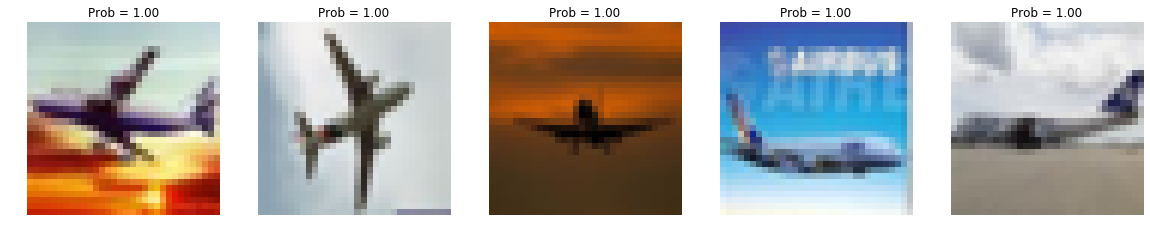

In [59]:
imgs = getImages(metric='best')